# Audio File Matching

This notebook continues the audio file matching problem. Be sure to have song.wav and clip.wav in the same directory as the notebook.

In this notebook, we will look at the problem of searching for a small audio clip inside a song.

The song "Mandelbrot Set" by Jonathan Coulton is licensed under <a href="http://creativecommons.org/licenses/by-nc/3.0/">CC BY-NC 3.0</a>

In [1]:
import numpy as np
import wave
import matplotlib.pyplot as plt
import scipy.io.wavfile
import operator
from IPython.display import Audio
%matplotlib inline

given_file = 'song.wav'
target_file = 'clip.wav'
rate_given,  given_signal  = scipy.io.wavfile.read(given_file)
rate_target, target_signal = scipy.io.wavfile.read(target_file)
given_signal  = given_signal[:2000000].astype(float)
target_signal = target_signal.astype(float)
def play_clip(start, end, signal=given_signal):
    scipy.io.wavfile.write('temp.wav', rate_given, signal[start:end].astype(np.int16))
    return Audio(url='temp.wav', autoplay=True)

def run_comparison(target_signal, given_signal, idxs=None):
    # Run everything if not called with idxs set to something
    if idxs is None:
        idxs = [i for i in range(len(given_signal)-len(target_signal))]
    return idxs, [vector_compare(target_signal, given_signal[i:i+len(target_signal)])
                for i in idxs]

play_clip(0, len(given_signal))

#scipy.io.wavfile.write(target_file, rate_given, (-0.125*given_signal[1380000:1380000+70000]).astype(np.int16))

We will load the song into the variable `given_signal` and load the short clip into the variable `target_signal`. Your job is to finish code that will identify the short clip's location in the song. The clip we are trying to find will play after executing the following block.

In [3]:
Audio(url=target_file, autoplay=True)

Your task is to define the function 'vector_compare' and run the following code. Because the song has a lot of data, you should use the provided examples from the previous parts of the problem before running the later code. Do you results here make sense given your answers to previous parts of the problem?

In [5]:
def vector_compare(desired_vec, test_vec):
    """This function compares two vectors, returning a number.
    The test vector with the highest return value is regarded as being closest to the desired vector."""
    # TODO CLIP ME!
    # The transpose is a gotcha! Stupid numpy
    return np.dot(desired_vec.T, test_vec)/(np.linalg.norm(desired_vec)*np.linalg.norm(test_vec)+1.e-10)

print("PART A:")
print(vector_compare(np.array([1,1,1]), np.array([1,1,1])))
print(vector_compare(np.array([1,1,1]), np.array([-1,-1,-1])))
print("PART C:")
print(vector_compare(np.array([1,2,3]), np.array([1,2,3])))
print(vector_compare(np.array([1,2,3]), np.array([2,3,4])))
print(vector_compare(np.array([1,2,3]), np.array([3,4,5])))
print(vector_compare(np.array([1,2,3]), np.array([4,5,6])))
print(vector_compare(np.array([1,2,3]), np.array([5,6,7])))
print(vector_compare(np.array([1,2,3]), np.array([6,7,8])))

PART A:
0.999999999967
-0.999999999967
PART C:
0.999999999993
0.992583333966
0.98270762982
0.974631846194
0.968329663729
0.963375338164


# Problem 1
Run the following code that runs `vector_compare` on every subsequence in the song- it will probably take at least 5 minutes. How do you interpret this plot to find where the clip is in the song?

That took 3.89 minutes to run


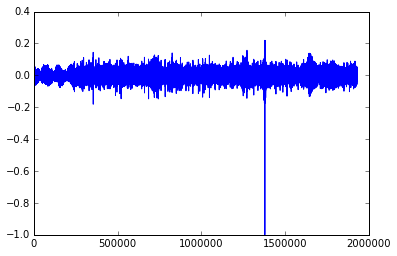

In [6]:
import time

t0 = time.time()
idxs, song_compare = run_comparison(target_signal, given_signal)
t1 = time.time()
plt.plot(idxs, song_compare)
print ("That took %(time).2f minutes to run" % {'time':(t1-t0)/60.0} )

# Problem 2
In the space below, write code that uses `song_compare` to print the index of `given_signal` where `target_signal` begins. Then, verify that your answer is correct by playing the song at that index using the `play_clip` function.

In [16]:
# TODO CLIP ME
index, value = max(enumerate([abs(i) for i in song_compare]), key=operator.itemgetter(1))
print (index)
play_clip(index,index+len(target_signal))

1380000


# Problem 3
Now suppose that our recording of `target_signal` wasn't perfect. We recorded it in a small room, so it turns out there were some echos! We will model the echos as
$$\textrm{target}(t) = \textrm{target}(t) - 0.5\times\textrm{target}(t-5000) + 0.125\times\textrm{target}(t-10000)$$

In [36]:
target_echo = target_signal - 0.5 * np.roll(target_signal, 5000) + 0.25 * np.roll(target_signal, 10000)
print(len(target_echo))
play_clip(0, len(target_echo), signal=target_echo)

70000


With your new target signal `target_echo`, run t

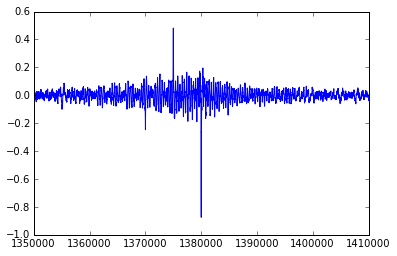

In [37]:
ind
idxs, song_compare = run_comparison(target_echo, given_signal, idxs=[i for i in range(1350000, 1410000)])
plt.plot(idxs, song_compare)
